In [1]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# importing pre-trained model from tensorflow hub
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))])

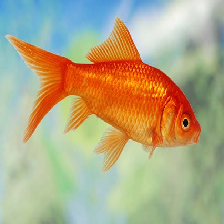

In [3]:
# reshizing image
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [4]:
# scaling image
gold_fish= np.array(gold_fish) / 255.0
gold_fish.shape

(224, 224, 3)

In [5]:
# adding 1 more dimension for predection
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [6]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result

array([[ 0.248503  ,  4.4933343 ,  9.902865  , ..., -0.67211676,
         1.7379675 , -0.3753209 ]], dtype=float32)

In [7]:
result.shape

(1, 1001)

In [8]:
predicted_label_index= np.argmax(result)
predicted_label_index

2

In [10]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [11]:
image_labels[predicted_label_index]

'goldfish'

### Flower dataset

In [12]:
# cache_dir indicates where to download data. I specified . which means current directory
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [13]:
data_dir

'.\\datasets\\flower_photos'

In [14]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [15]:
# list of all jpg file
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [16]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


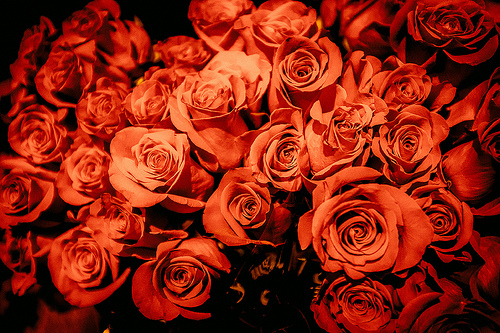

In [19]:
roses = list(data_dir.glob('roses/*'))
Image.open((str(roses[2])))

In [20]:
# flower dictionary name
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [21]:
# giving number to dictionary name

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [22]:
# reading 1 file path
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [23]:
# getting image shape
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [24]:
# resizing all image
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [25]:
X,y= [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        # resizing all images
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        # sending flower label in y
        y.append(flowers_labels_dict[flower_name])

In [26]:
# y unique values
np.unique(y)

array([0, 1, 2, 3, 4])

In [27]:
# converting to numpy array
X= np.array(X)
y= np.array(y)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
# scaling 
X_train_scaled= X_train / 255
X_test_scaled= X_test / 255

In [30]:
X[0].shape

(224, 224, 3)

In [31]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [32]:
# resizing
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

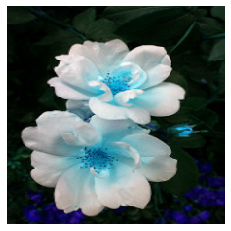

In [33]:
# plotting few images
plt.axis('off')
plt.imshow(X[0])

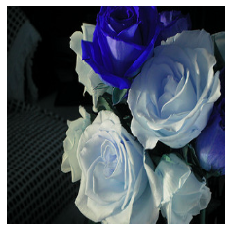

In [34]:
plt.axis('off')
plt.imshow(X[1])

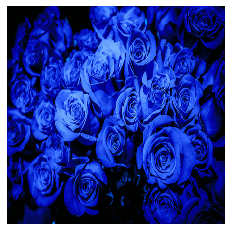

In [35]:
plt.axis('off')
plt.imshow(X[2])

In [36]:
# classifier is pre-trained model
# predicting
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
# taking highest return value
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 880, 795], dtype=int64)

In [37]:
image_labels[795]

'shower curtain'

In [38]:
# predicted wrong
image_labels[880]

'umbrella'

In [39]:
# using another trained model
# its last layer id different from above pre-defined model
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
# trainable False means it won't train model
pretrained_model_without_top_layer = hub.KerasLayer(feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [40]:
model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(5)])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [42]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [43]:
model.fit(X_train_scaled, y_train, epochs=5, verbose=1)

Epoch 1/5
86/86 [==============================] - 182s 2s/step - loss: 0.8278 - accuracy: 0.6922
Epoch 2/5
86/86 [==============================] - 173s 2s/step - loss: 0.4168 - accuracy: 0.8583
Epoch 3/5
86/86 [==============================] - 165s 2s/step - loss: 0.3264 - accuracy: 0.8932
Epoch 4/5
86/86 [==============================] - 326s 4s/step - loss: 0.2773 - accuracy: 0.9106
Epoch 5/5
86/86 [==============================] - 276s 3s/step - loss: 0.2329 - accuracy: 0.9259


In [44]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 111s 3s/step - loss: 0.3986 - accuracy: 0.8540


[0.3986051678657532, 0.8540304899215698]